In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Business Understanding
Problem definition: The goal of this project is to create a predictive modeling to predict the likelihood of diabetes based on demographic and health-related features.



In [2]:
df=pd.read_csv("/kaggle/input/100000-diabetes-clinical-dataset/diabetes_dataset.csv")

<>:1: SyntaxWarning: invalid escape sequence '\L'
<>:1: SyntaxWarning: invalid escape sequence '\L'
C:\Users\Mary\AppData\Local\Temp\ipykernel_33728\3995355221.py:1: SyntaxWarning: invalid escape sequence '\L'
  df=pd.read_csv("D:\Learning\ML\Datasets\diabetes_dataset.csv")


In [3]:
df.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  100000 non-null  int64  
 1   gender                100000 non-null  object 
 2   age                   100000 non-null  float64
 3   location              100000 non-null  object 
 4   race:AfricanAmerican  100000 non-null  int64  
 5   race:Asian            100000 non-null  int64  
 6   race:Caucasian        100000 non-null  int64  
 7   race:Hispanic         100000 non-null  int64  
 8   race:Other            100000 non-null  int64  
 9   hypertension          100000 non-null  int64  
 10  heart_disease         100000 non-null  int64  
 11  smoking_history       100000 non-null  object 
 12  bmi                   100000 non-null  float64
 13  hbA1c_level           100000 non-null  float64
 14  blood_glucose_level   100000 non-null  int64  
 15  d

In [5]:
df['smoking_history'].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [6]:
df.isnull().sum()

year                    0
gender                  0
age                     0
location                0
race:AfricanAmerican    0
race:Asian              0
race:Caucasian          0
race:Hispanic           0
race:Other              0
hypertension            0
heart_disease           0
smoking_history         0
bmi                     0
hbA1c_level             0
blood_glucose_level     0
diabetes                0
dtype: int64

* Data Understanding and EDA *

Hi, I made some changes to Data Understanding part here. i appreciate it if anybody makes suggestions to improve this part (especially Mr. H.N).

I did not make any changes to the dataset. Maybe it is better to do it in the data cleaning and data preparation part? thank you 
serveh

In this section, we want to understand the dataset, analyze it, and explore it

In [7]:
#Importing Libraries

import numpy as np
import pandas as pd
import pandas as read_csv
import seaborn as sns
import matplotlib.pyplot as plt

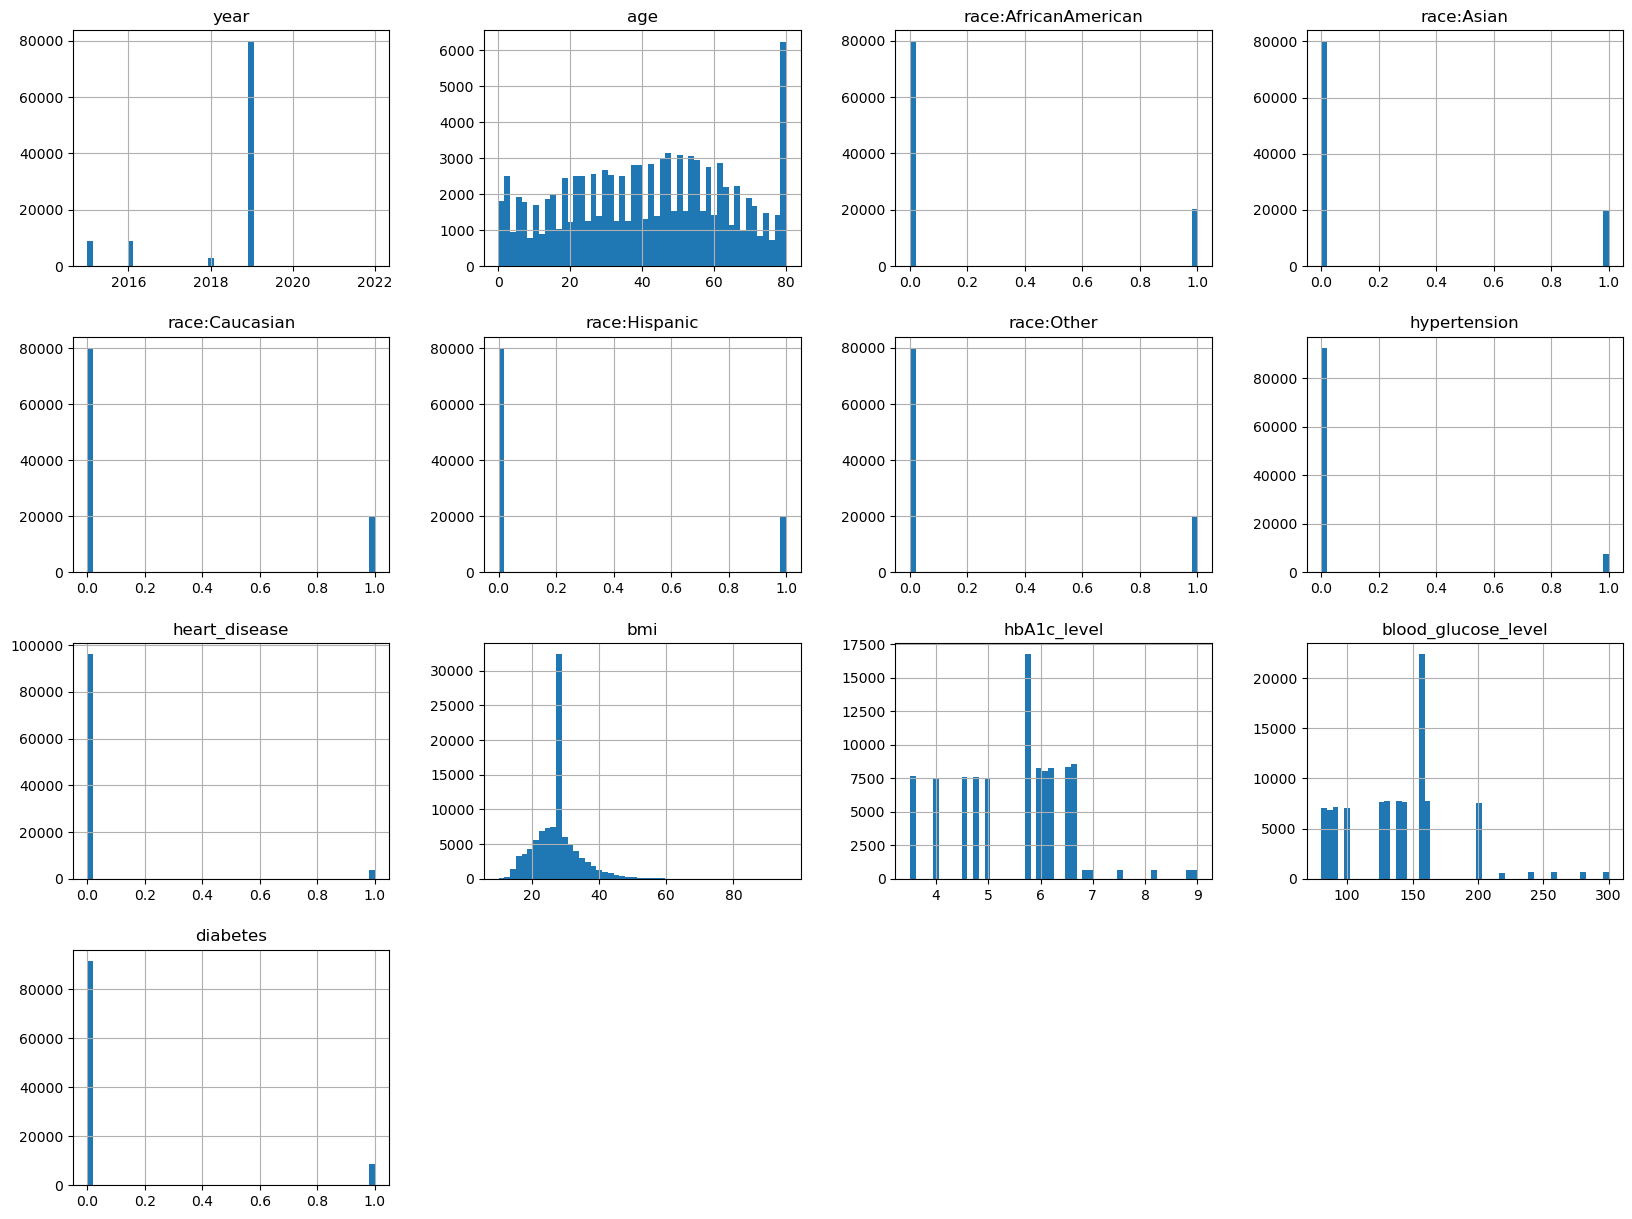

In [8]:
df.hist(bins=10, figsize=(20, 8))
plt.show()

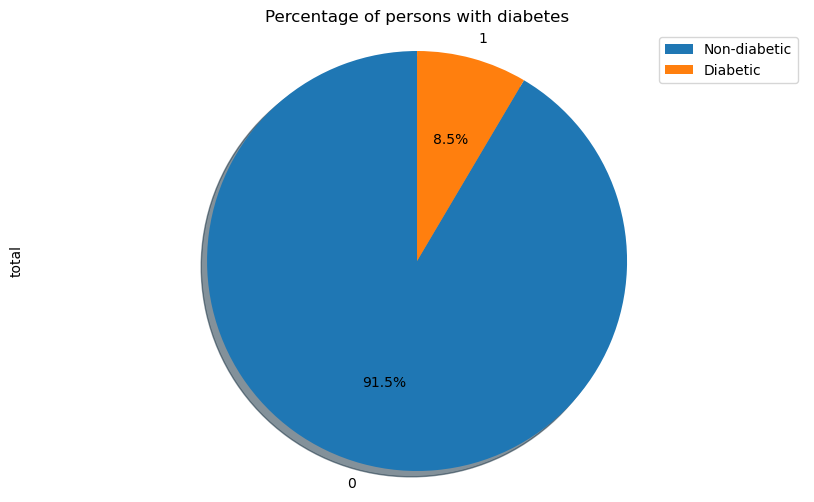

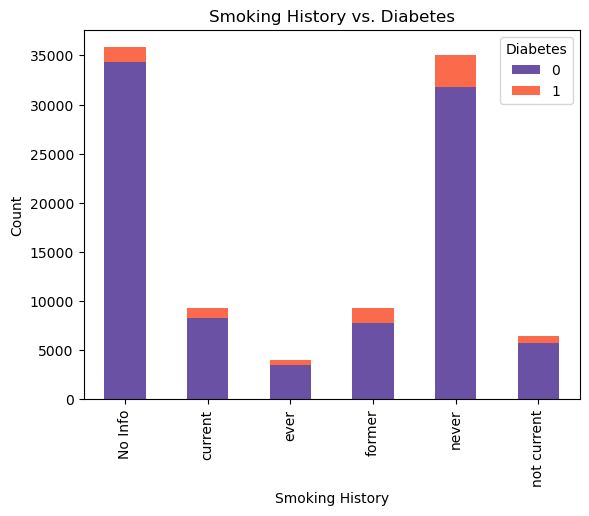

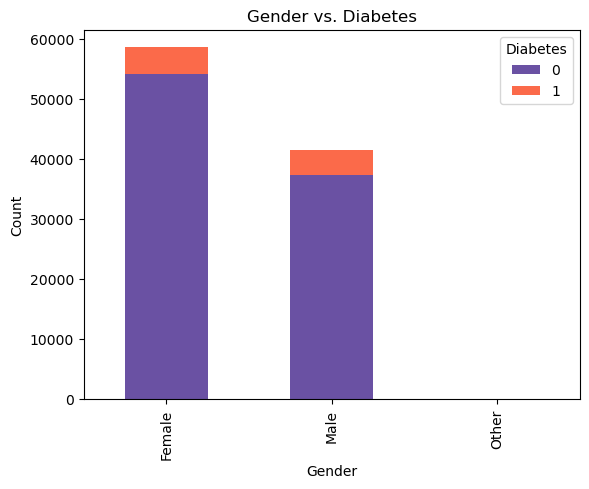

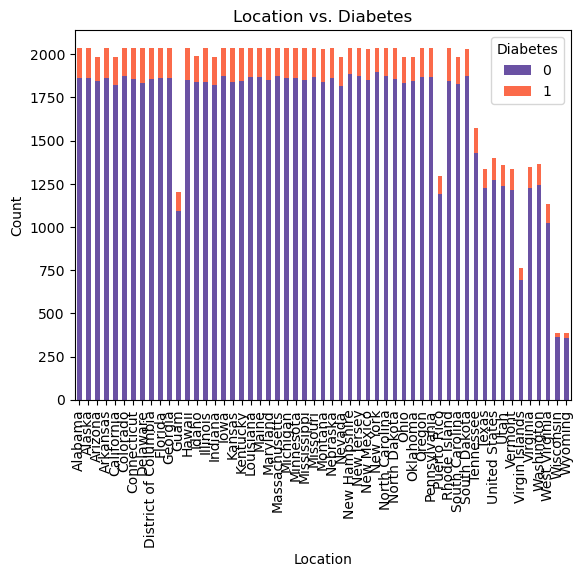

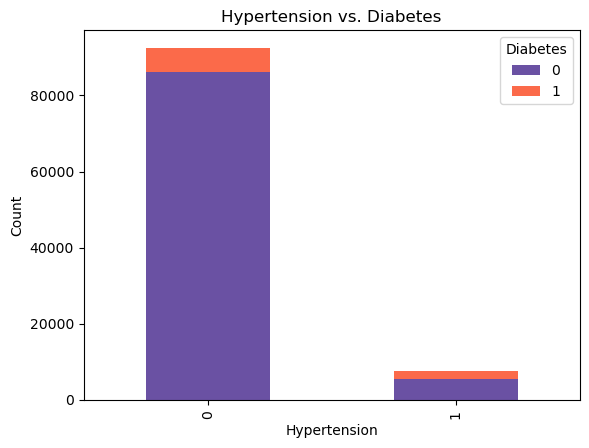

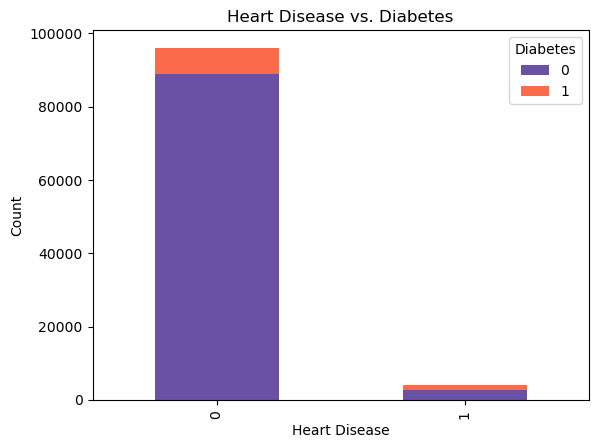

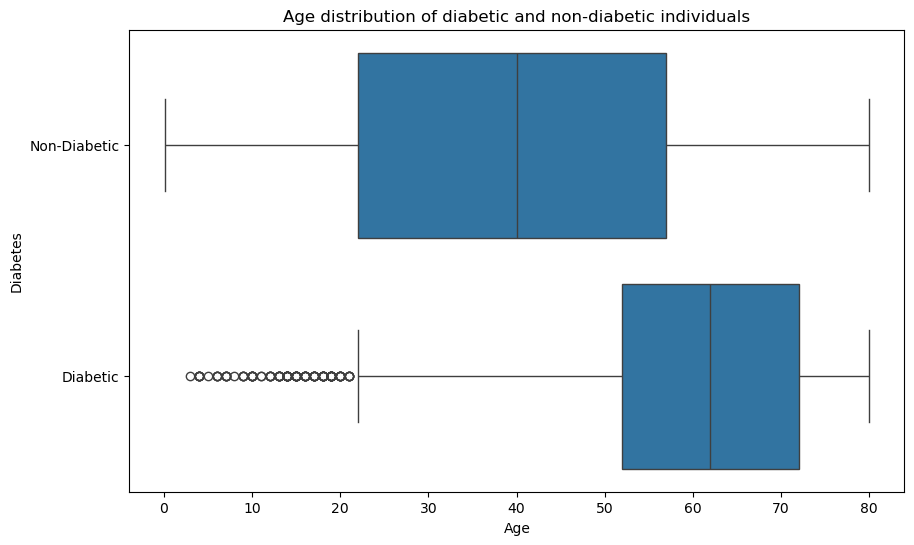

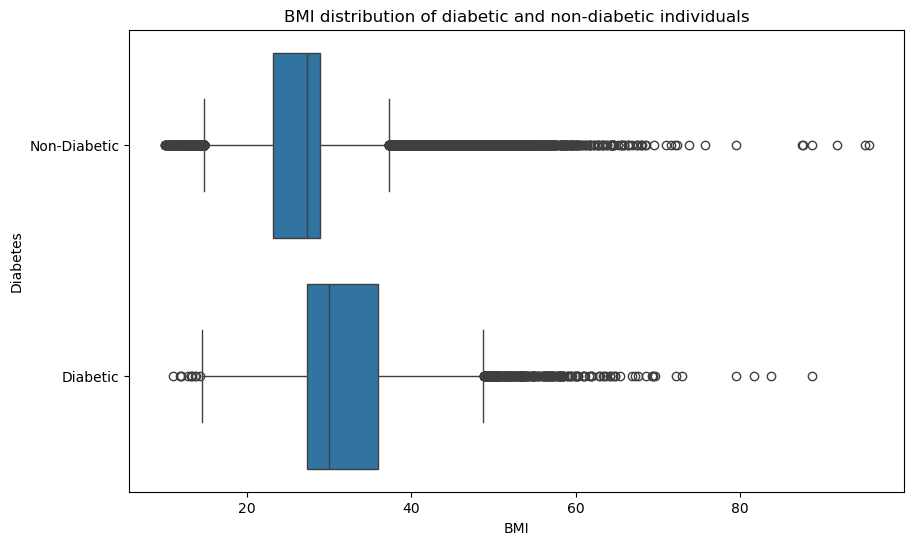

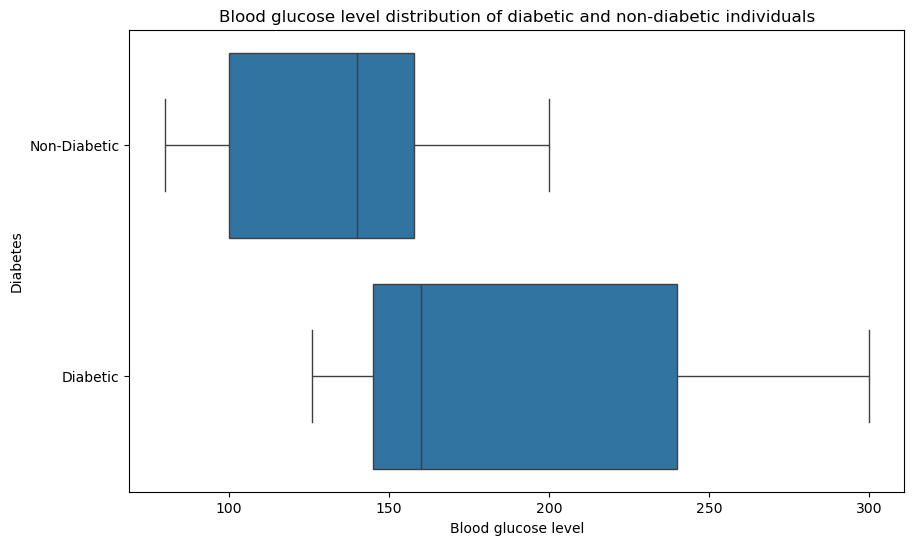

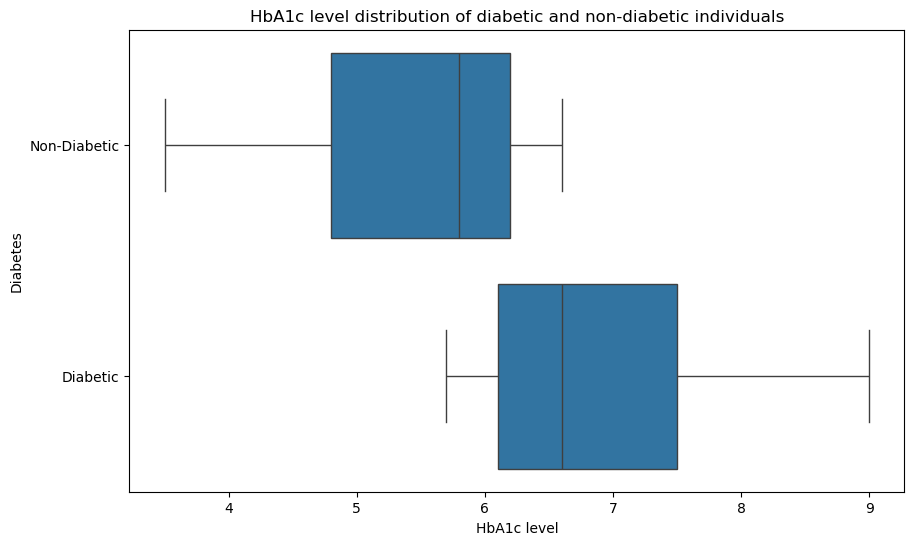

In [9]:
#How about our dataset? Let's begin
# Creating a piechart for persons with and without diabetes 
df_diabete = df.groupby('diabetes')['gender'].count().reset_index().rename(columns = {'gender': 'total'})
df_diabete['total'].plot(kind='pie',
                            figsize=(10, 6),
                            autopct='%1.1f%%',
                            startangle=90,
                            shadow=True,     
                            )
plt.title('Percentage of persons with diabetes')
plt.axis('equal')
plt.legend(labels= ['Non-diabetic', 'Diabetic'], loc='upper right')
plt.show()

##########
# Creating a crosstab for different features (colomns) and target (diabetes colomns) 

def plot_crosstab(df, feature, title, xlabel):
    crosstab = pd.crosstab(df[feature], df['diabetes'])
    crosstab.plot(kind='bar', stacked=True, color=['#6a51a3', '#fb6a4a'])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Count')
    plt.legend(title='Diabetes')
    plt.show()

# Plotting different features
plot_crosstab(df, 'smoking_history', 'Smoking History vs. Diabetes', 'Smoking History')
plot_crosstab(df, 'gender', 'Gender vs. Diabetes', 'Gender')
plot_crosstab(df, 'location', 'Location vs. Diabetes', 'Location')
plot_crosstab(df, 'hypertension', 'Hypertension vs. Diabetes', 'Hypertension')
plot_crosstab(df, 'heart_disease', 'Heart Disease vs. Diabetes', 'Heart Disease')

############
# Creating figures for age,blood glucose level,HbA1c level and diabetes 

def plot_diabetes_distribution(df, feature, title, xlabel):
    df['diabetes'] = df['diabetes'].astype('category')
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, y='diabetes', x=feature)
    plt.title(title)
    plt.ylabel('Diabetes')
    plt.yticks(ticks=[0, 1], labels=['Non-Diabetic', 'Diabetic'])
    plt.xlabel(xlabel)
    plt.show()

# Plotting different features
plot_diabetes_distribution(df, 'age', 'Age distribution of diabetic and non-diabetic individuals', 'Age')
plot_diabetes_distribution(df, 'bmi', 'BMI distribution of diabetic and non-diabetic individuals', 'BMI')
plot_diabetes_distribution(df, 'blood_glucose_level', 'Blood glucose level distribution of diabetic and non-diabetic individuals', 'Blood glucose level')
plot_diabetes_distribution(df, 'hbA1c_level', 'HbA1c level distribution of diabetic and non-diabetic individuals', 'HbA1c level')


### Encoding categorical data

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le=LabelEncoder()
df['gender']=le.fit_transform(df['gender'])
df['age']=le.fit_transform(df['age'])
df['location']=le.fit_transform(df['location'])
df = pd.get_dummies(df, columns=['smoking_history'], prefix='smoking_history')

In [12]:
df.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,...,bmi,hbA1c_level,blood_glucose_level,diabetes,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,2020,0,53,0,0,0,0,0,1,0,...,27.32,5.0,100,0,False,False,False,False,True,False
1,2015,0,50,0,0,1,0,0,0,0,...,19.95,5.0,90,0,False,False,False,False,True,False
2,2015,1,39,0,0,0,0,0,1,0,...,23.76,4.8,160,0,False,False,False,False,True,False
3,2015,1,62,0,0,0,1,0,0,0,...,27.32,4.0,159,0,False,False,False,False,True,False
4,2016,0,73,0,1,0,0,0,0,0,...,23.75,6.5,90,0,False,False,False,False,True,False


# Descriptive Analysis

In [13]:
summary=df.describe()
summary

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2018.360820,0.414660,62.671790,24.748430,0.202230,0.200150,0.198760,0.19888,0.199980,0.07485,0.039420,27.320767,5.527507,138.058060
std,1.345239,0.493031,22.966612,14.786326,0.401665,0.400114,0.399069,0.39916,0.399987,0.26315,0.194593,6.636783,1.070672,40.708136
min,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,10.010000,3.500000,80.000000
25%,2019.000000,0.000000,45.000000,12.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,23.630000,4.800000,100.000000
50%,2019.000000,0.000000,64.000000,25.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,27.320000,5.800000,140.000000
75%,2019.000000,1.000000,81.000000,37.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,29.580000,6.200000,159.000000
max,2022.000000,2.000000,101.000000,54.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,95.690000,9.000000,300.000000


## key insights

**Year**:This dataset includes year range from 2015-2022 with the mean year being 2018.The median year is 2019 with most data points.

**Gender**: There are more females than males in the dataset.

**age**:The age range is from 0 to 101 years, with a mean age of 62.67 years.The median age is 64 years, indicating that half of the individuals are younger than 64 years and half are older.

**Race distribution**: 
* African American: About 20.2%
* Asian: About 20.0%
* Caucasian: About 19.9%
* Hispanic: About 19.9%
* Other: About 20.0%

**Hypertension:**: Approximately 7.5% of individuals have hypertension.

**Heart Disease**: Approximately 3.9% of individuals have heart disease.

**BMI:**: The mean BMI is 27.32.The median BMI is 27.32, indicating that half of the individuals have a BMI below this value.
BMI values range from 10.01 to 95.69.

**HbA1c** : HbA1c levels range from 3.50 to 9.00.The median HbA1c level is 5.80.

**Blood Glucose Level** :The mean blood glucose level is 138.06 mg/dL. The median blood glucose level is 140 mg/dL.
Blood glucose levels range from 80 to 300 mg/dL.

**Diabetes**: Approximately 8.5% of individuals in the dataset have diabetes.

# Correlation Analysis

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

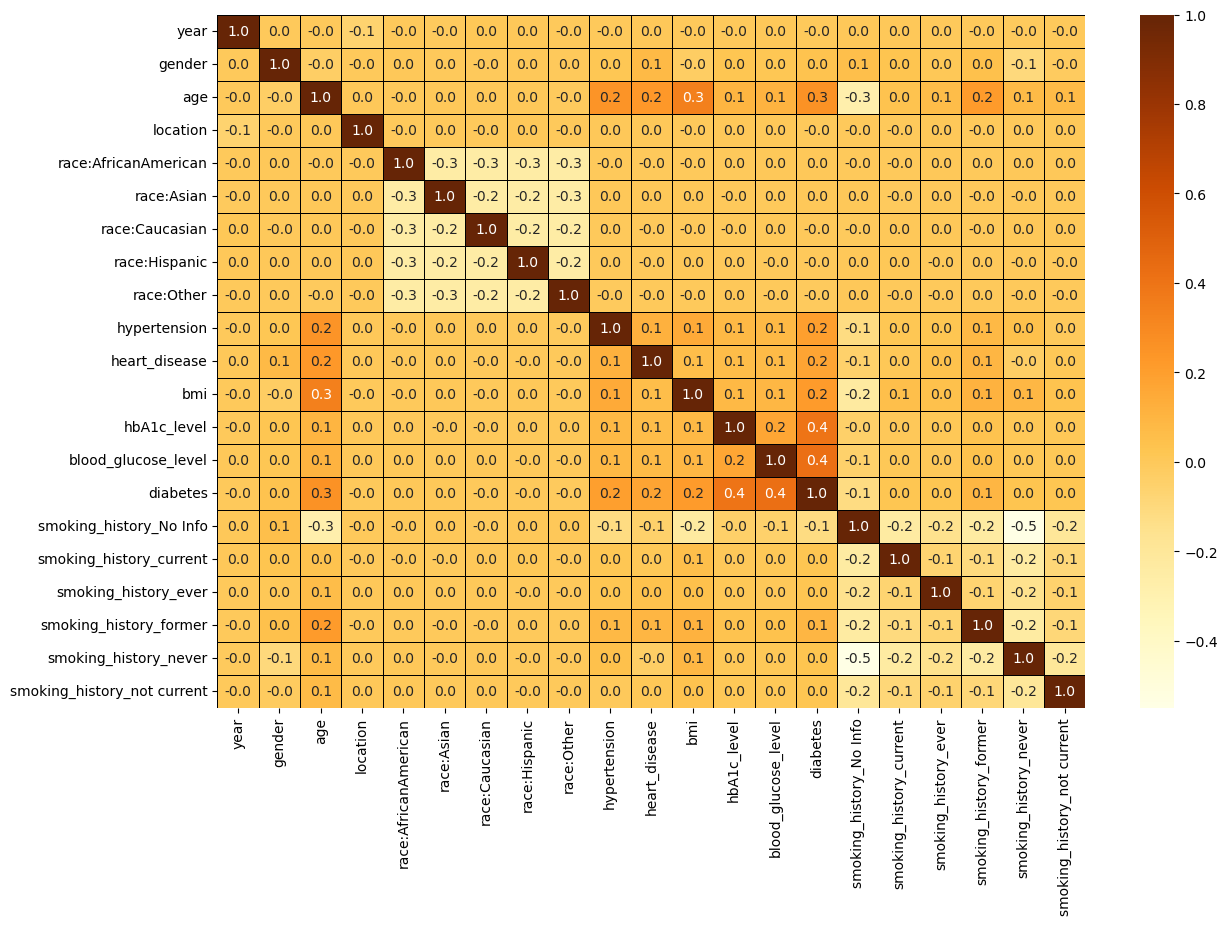

In [15]:
plt.figure(figsize=(14,9))
corr=df.corr()
sns.heatmap(corr,annot=True,cmap="YlOrBr",linewidths=0.6,fmt=".1f",linecolor="black")
plt.show()

In [16]:
corr_pairs=corr.unstack()
corr_pairs=corr_pairs[corr_pairs!=1].dropna()
corr_pairs=corr_pairs.sort_values(ascending=False)
top_correlated_pairs=corr_pairs.head(10)
low_correlated_pairs=corr_pairs.tail(10)
top_correlated_pairs

blood_glucose_level  diabetes               0.419558
diabetes             blood_glucose_level    0.419558
hbA1c_level          diabetes               0.400660
diabetes             hbA1c_level            0.400660
age                  bmi                    0.344463
bmi                  age                    0.344463
diabetes             age                    0.255796
age                  diabetes               0.255796
hypertension         age                    0.248903
age                  hypertension           0.248903
dtype: float64

In [17]:
low_correlated_pairs

race:Hispanic            race:AfricanAmerican      -0.250860
race:AfricanAmerican     race:Hispanic             -0.250860
race:Other               race:AfricanAmerican      -0.251725
race:AfricanAmerican     race:Other                -0.251725
race:Asian               race:AfricanAmerican      -0.251859
race:AfricanAmerican     race:Asian                -0.251859
smoking_history_No Info  age                       -0.282780
age                      smoking_history_No Info   -0.282780
smoking_history_No Info  smoking_history_never     -0.549299
smoking_history_never    smoking_history_No Info   -0.549299
dtype: float64

### Key Insights
**Strongest Correlations:**

**Diabetes and Blood Glucose Level:** There is a moderate positive correlation (approximately 0.4), indicating that as blood glucose levels increase, the likelihood of diabetes also increases.
Diabetes and HbA1c Level: There is a moderate positive correlation (approximately 0.4), suggesting that higher HbA1c levels are associated with a higher likelihood of diabetes.
Age and BMI: There is a moderate positive correlation (approximately 0.3), suggesting that older individuals tend to have higher BMI.

**Moderate Correlations:**

**Hypertension and Age:** There is a positive correlation (approximately 0.2), indicating that older individuals are more likely to have hypertension.
Heart Disease and Age: There is a positive correlation (approximately 0.2), suggesting that older individuals are more likely to have heart disease.
Smoking History (current) and Diabetes: There is a weak negative correlation (approximately -0.1 to -0.2), indicating that current smokers are slightly less likely to have diabetes.

**Weak Correlations:**

**Smoking History (various categories) and Diabetes:** Most categories of smoking history have very weak or no correlation with diabetes. This could indicate that smoking history, in this dataset, is not a strong predictor of diabetes.

**Gender and Hypertension:** There is a weak positive correlation (approximately 0.2), suggesting a slight gender difference in hypertension prevalence.
Gender and Heart Disease: There is a weak positive correlation (approximately 0.1), indicating a slight gender difference in heart disease prevalence.

**Negative Correlations:**

**Smoking History (current) and HbA1c Level:** There is a weak negative correlation, suggesting that current smokers tend to have slightly lower HbA1c levels.

**Smoking History (No Info) and Age:** There is a moderate negative correlation (approximately -0.3), indicating that individuals without smoking history information tend to be younger.

# Pipeline

numerical_features=['age', 'bmi', 'hbA1c_level', 'blood_glucose_level']
categorical_features=[]
Test Accuracy: 0.9681
Mean CV recall: 0.6890
Standard Deviation of CV recall: 0.0103


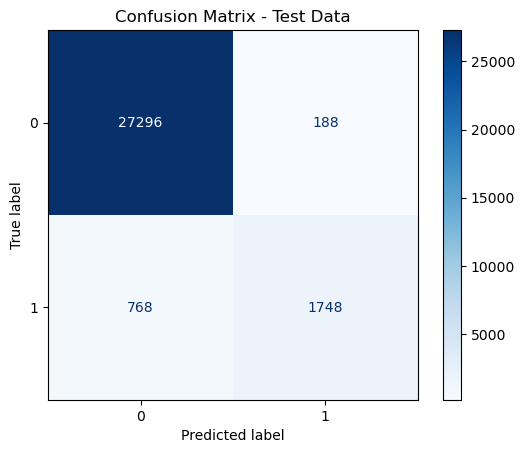

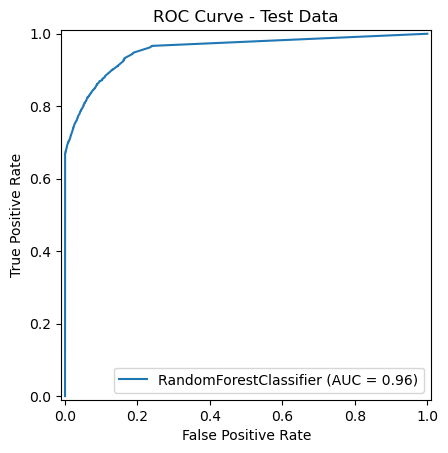

In [18]:
# Hello Team. This is Nafiseh, I added the entire pipeline in a single cell containing some of the main parts. Please use it to add any missing code and finish this project ASAP.
# Preparing the pipeline with the final selected Transformation method 

import pandas as pd
from numpy import mean
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder

from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, roc_curve, auc
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay




# numerical and categorical features lists 
# Automatically detect numerical and categorical columns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Exclude binary columns from the numerical features
binary_columns = [col for col in numerical_features if df[col].nunique() == 2]
numerical_features = [col for col in numerical_features if col not in binary_columns]
#numerical_features = [col for col in numerical_features if df[col].nunique() != 2]

# Remove the target column from the feature lists
target_column = 'diabetes'
if target_column in numerical_features:
    numerical_features.remove(target_column)
if target_column in categorical_features:
    categorical_features.remove(target_column)

# Remove the 'year' column if it exists in numerical_features
year_column = 'year'
if year_column in numerical_features:
    numerical_features.remove(year_column)
    
# Inspecting the list of numerical and categorical features:
print(f'numerical_features={numerical_features}\ncategorical_features={categorical_features}')


# Define preprocessing for numerical features (with Polynomial Features and imputer)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),# Handling missing values with 'mean' strategy
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False))
])

# Define preprocessing for categorical features
categorical_transformer = Pipeline(steps=[
    ('Imputer', SimpleImputer(strategy='most_frequent')), #to handle missing values in categorical features
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# final pipeline with preprocessing and the final model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier())
])

# Split the data into training and test sets
X = df.drop('diabetes', axis=1)
y = df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit our pipeline on the training data
pipeline.fit(X_train, y_train)

# Evaluate the pipeline on the test data
y_pred = pipeline.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {test_accuracy:.4f}')


# Evaluate the pipeline using cross-validation
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=10, scoring='recall')
print(f'Mean CV recall: {cv_scores.mean():.4f}')
print(f'Standard Deviation of CV recall: {cv_scores.std():.4f}')



# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')
plt.title('Confusion Matrix - Test Data')
plt.show()

# Plot Receiver Operating Characteristic (ROC) curve for test data using predictions from the current trianed model
y_pred_proba = pipeline.predict_proba(X_test)[:, 1] #method gives predicted probabilities of each class for test set X_test ([:,1] 2nd column is for positive class)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba) #False Positive Rate (fpr), True Positive Rate (tpr), _
roc_auc = auc(fpr, tpr) # Calculate the Area Under ROC Curve (AUC). This single value summarizes performance of classifier
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='RandomForestClassifier').plot()
plt.title('ROC Curve - Test Data')
plt.show()

In [48]:
#I have added some of the models to the pipeline.
#Of course, this is the initial version and it will be developed and improved (with Vahide's help)
#I will be grateful if you have any comments
#Thank you,
# Maryam

In [19]:
!pip install xgboost

**************************************** AdaBoost ****************************************
Test Accuracy of AdaBoost model: 0.9720
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     27484
           1       1.00      0.67      0.80      2516

    accuracy                           0.97     30000
   macro avg       0.99      0.83      0.89     30000
weighted avg       0.97      0.97      0.97     30000

Mean CV recall: 0.6703
Standard Deviation of CV recall: 0.0119


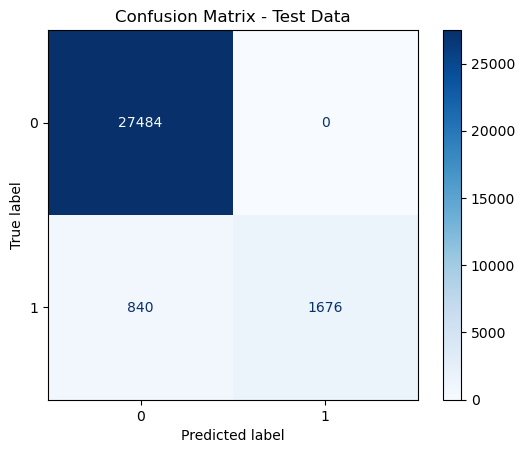

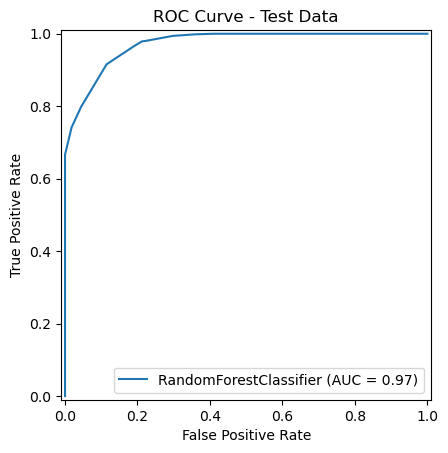

**************************************** XGB ****************************************
Test Accuracy of XGB model: 0.9718
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     27484
           1       0.98      0.68      0.80      2516

    accuracy                           0.97     30000
   macro avg       0.98      0.84      0.89     30000
weighted avg       0.97      0.97      0.97     30000

Mean CV recall: 0.6790
Standard Deviation of CV recall: 0.0100


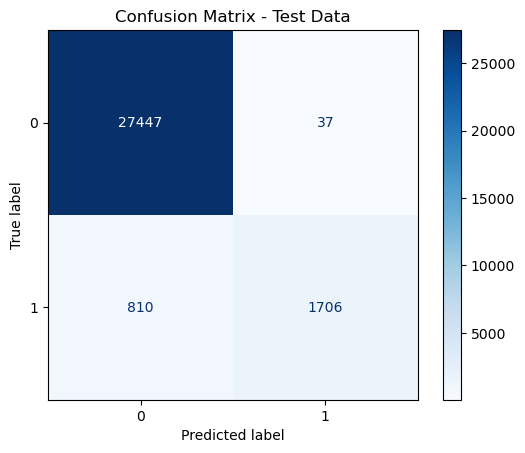

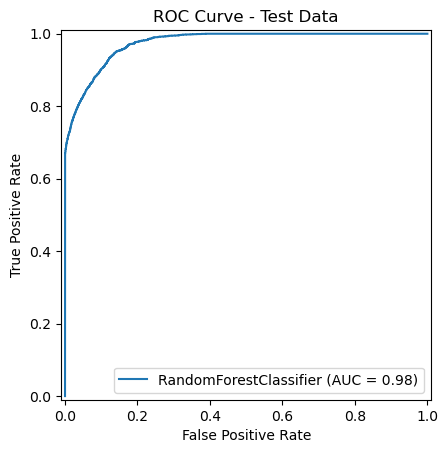

**************************************** LogisticRegression ****************************************
Test Accuracy of LogisticRegression model: 0.9620
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     27484
           1       0.90      0.61      0.73      2516

    accuracy                           0.96     30000
   macro avg       0.93      0.80      0.85     30000
weighted avg       0.96      0.96      0.96     30000

Mean CV recall: 0.6268
Standard Deviation of CV recall: 0.0169


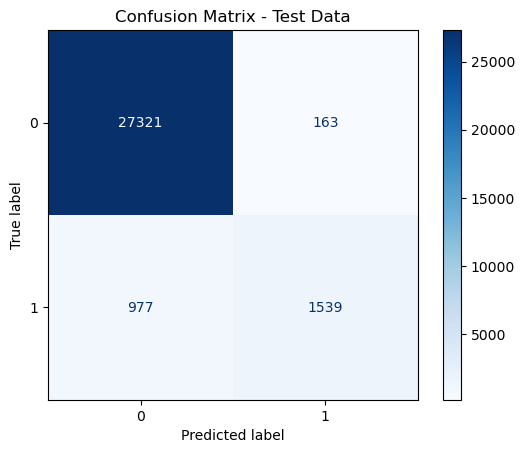

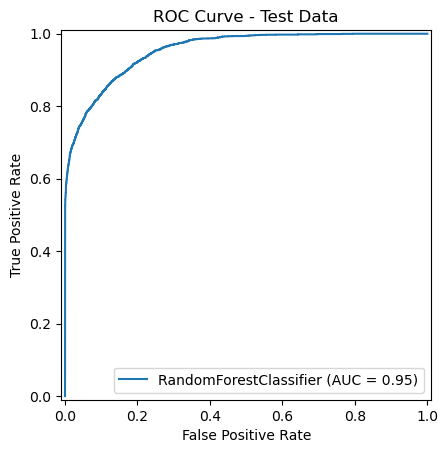

**************************************** KNN ****************************************
Test Accuracy of KNN model: 0.9676
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     27484
           1       0.92      0.68      0.78      2516

    accuracy                           0.97     30000
   macro avg       0.94      0.83      0.88     30000
weighted avg       0.97      0.97      0.97     30000

Mean CV recall: 0.6691
Standard Deviation of CV recall: 0.0138


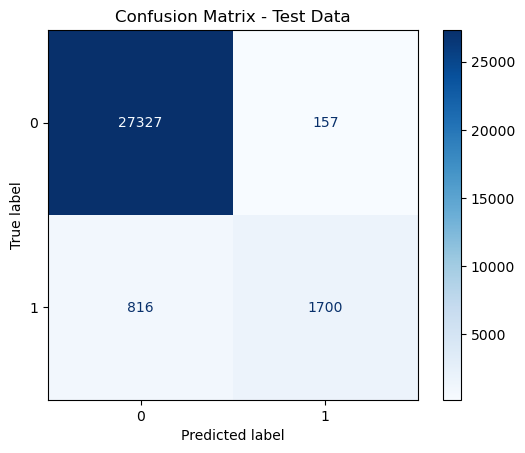

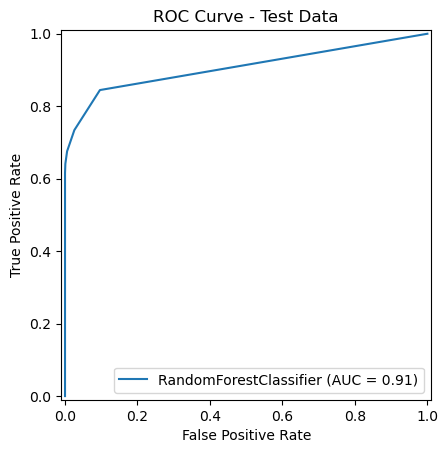

**************************************** RandomForestClassifier ****************************************
Test Accuracy of RandomForestClassifier model: 0.9685
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     27484
           1       0.91      0.69      0.79      2516

    accuracy                           0.97     30000
   macro avg       0.94      0.84      0.89     30000
weighted avg       0.97      0.97      0.97     30000

Mean CV recall: 0.6912
Standard Deviation of CV recall: 0.0102


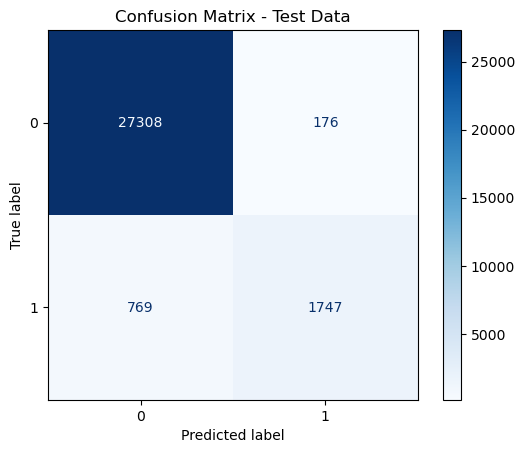

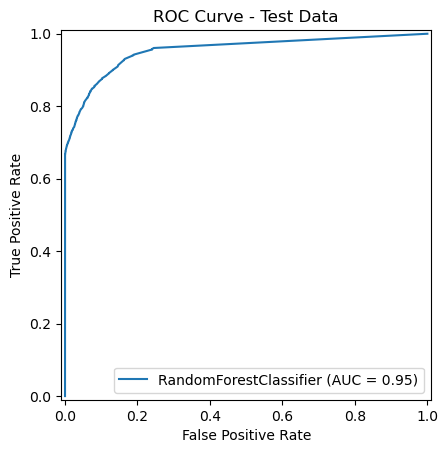

**************************************** SVC ****************************************
Test Accuracy of SVC model: 0.9684
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     27484
           1       0.99      0.63      0.77      2516

    accuracy                           0.97     30000
   macro avg       0.98      0.81      0.88     30000
weighted avg       0.97      0.97      0.97     30000

Mean CV recall: 0.6295
Standard Deviation of CV recall: 0.0156


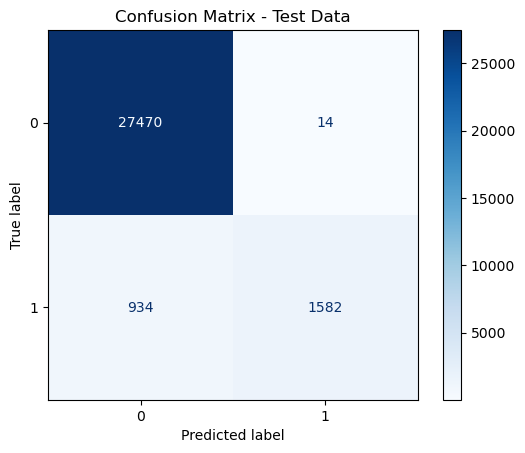

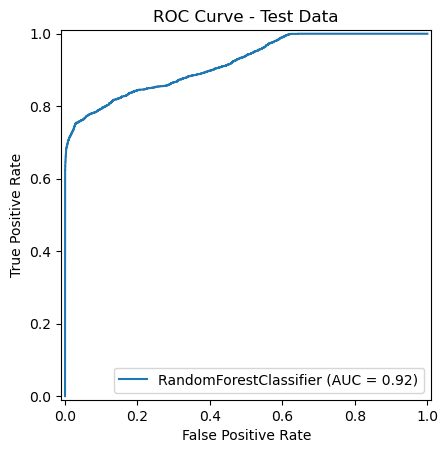

In [20]:
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier  
from sklearn.svm import SVC  
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Definition a dictionary of the models
models={
    'AdaBoost':AdaBoostClassifier(algorithm='SAMME'),
    'XGB':XGBClassifier(max_depth=4),
    'LogisticRegression': LogisticRegression(),
    'KNN':KNeighborsClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'SVC':SVC(probability=True, random_state=42),  
}

#Applying Pipeline to all models
for model_name, model in models.items():
    print("****************************************",model_name,"****************************************")
    pipeline = Pipeline(steps=[('preprocessor',preprocessor), ('model',model)])
    pipeline.fit(X_train, y_train)
    
# Evaluate the pipeline on the test data
    y_pred = pipeline.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f'Test Accuracy of {model_name} model: {test_accuracy:.4f}')
    class_report= classification_report(y_test, y_pred)
    print(class_report)
    
# Evaluate the pipeline using cross-validation
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=10, scoring='recall')
    print(f'Mean CV recall: {cv_scores.mean():.4f}')
    print(f'Standard Deviation of CV recall: {cv_scores.std():.4f}')
    
# Display confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')
    plt.title('Confusion Matrix - Test Data')
    plt.show()
    
# Plot Receiver Operating Characteristic (ROC) curve for test data using predictions from the current trianed model
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1] #method gives predicted probabilities of each class for test set X_test ([:,1] 2nd column is for positive class)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba) #False Positive Rate (fpr), True Positive Rate (tpr), _
    roc_auc = auc(fpr, tpr) # Calculate the Area Under ROC Curve (AUC). This single value summarizes performance of classifier
    RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='RandomForestClassifier').plot()
    plt.title('ROC Curve - Test Data')
    plt.show()


## XGBOOST

Mean Train Accuracy: 0.972
Mean Test Accuracy: 0.972


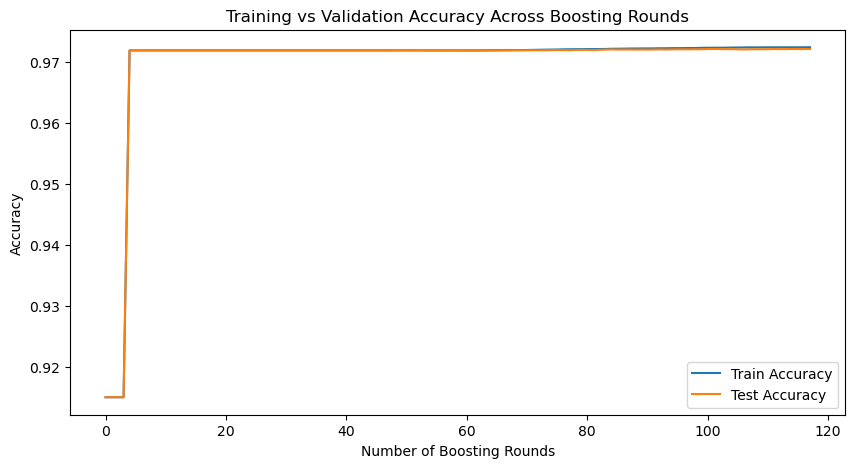

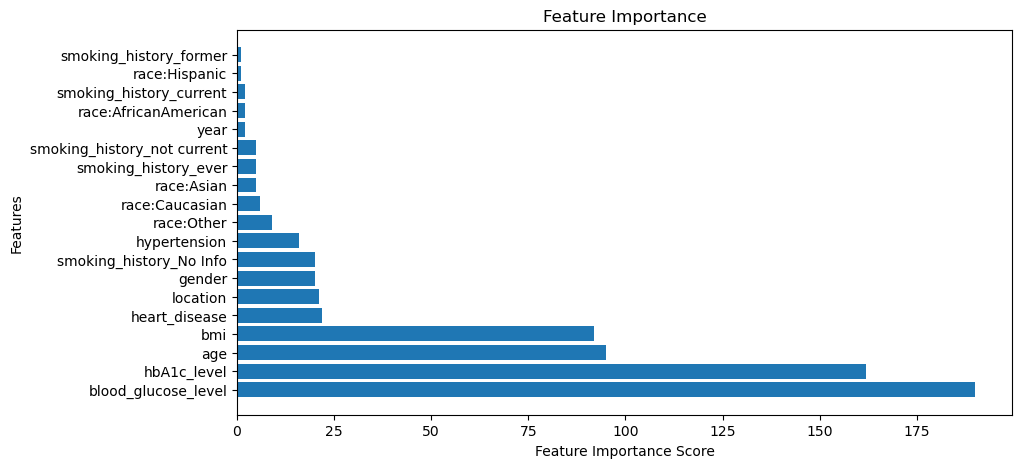

In [42]:
#Parameter tunning for Xgboost model
import matplotlib.pyplot as plt
import xgboost as xgb

X=df.drop(columns=['diabetes'])
y=df['diabetes']
dtrain = xgb.DMatrix(X, label=y)
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 4,  # Reduced depth to prevent complex models
    'eta': 0.1,  # Lower learning rate to make the learning process more conservative
    'lambda': 1,  # L2 regularization term on weights (increased to reduce overfitting)
    'alpha': 0.3,  # L1 regularization term on weights
    'seed': 42
}
# Perform cross-validation
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=500,  # Number of boosting rounds (trees to build)
    nfold=10,  # Number of folds in CV
    metrics={'error'},  # Primary metric to evaluate during CV
    early_stopping_rounds=50,  # Stop if 50 rounds without improvement
    as_pandas=True,
    seed=42
)

# Compute mean accuracy from the CV results
mean_train_accuracy = (1 - cv_results['train-error-mean']).iloc[-1]
mean_test_accuracy = (1 - cv_results['test-error-mean']).iloc[-1]
print(f"Mean Train Accuracy: {mean_train_accuracy:.3f}")
print(f"Mean Test Accuracy: {mean_test_accuracy:.3f}")
# Plotting the training and testing error metrics
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(1 - cv_results['train-error-mean'], label='Train Accuracy')
ax.plot(1 - cv_results['test-error-mean'], label='Test Accuracy')
ax.set_xlabel("Number of Boosting Rounds")
ax.set_ylabel("Accuracy")
ax.set_title("Training vs Validation Accuracy Across Boosting Rounds")
ax.legend()
plt.show()

model = xgb.train(params, dtrain, num_boost_round=cv_results.shape[0])

# Get feature importance scores and plot them
feature_importance = model.get_score(importance_type='weight')
sorted_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

# Plot feature importance
fig, ax = plt.subplots(figsize=(10, 5))
ax.barh([x[0] for x in sorted_importance], [x[1] for x in sorted_importance])
ax.set_xlabel("Feature Importance Score")
ax.set_ylabel("Features")
ax.set_title("Feature Importance")
plt.show()


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#Logestic Regression import library moved to pipeline cell
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score,confusion_matrix

In [22]:
X=df.drop(columns=['diabetes'])
y=df['diabetes']

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

## Logistic Regression

In [25]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [26]:
y_pred = model.predict(X_test)

In [27]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

In [28]:
print(f'accuracy: {accuracy}')
print(f'f1 score: {f1}')
print(f'roc_auc: {roc_auc}')
print(f'confusuion matrix: \n{confusion}')


accuracy: 0.9612
f1 score: 0.7358747447243023
roc_auc: 0.813172752025198
confusuion matrix: 
[[18143   154]
 [  622  1081]]


## AdaBoost Classifier

In [29]:
adb = AdaBoostClassifier()
adb_model = adb.fit(X_train,y_train)

C:\Users\Mary\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [30]:
y_adb_pred=model.predict(X_test)

In [31]:
adb_accuracy = accuracy_score(y_test, y_adb_pred)
adb_f1 = f1_score(y_test, y_adb_pred)
adb_roc_auc = roc_auc_score(y_test, y_adb_pred)
adb_confusion = confusion_matrix(y_test, y_adb_pred)

In [32]:
print(f'accuracy: {adb_accuracy}')
print(f'f1 score: {adb_f1}')
print(f'roc_auc: {adb_roc_auc}')
print(f'confusuion matrix: \n{adb_confusion}')

accuracy: 0.9612
f1 score: 0.7358747447243023
roc_auc: 0.813172752025198
confusuion matrix: 
[[18143   154]
 [  622  1081]]


## RandomForest Classifier

In [33]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_rf_pred = rf.predict(X_test)

In [34]:
rf_accuracy = accuracy_score(y_test, y_rf_pred)
rf_f1 = f1_score(y_test, y_rf_pred)
rf_roc_auc = roc_auc_score(y_test, y_rf_pred)
rf_confusion = confusion_matrix(y_test, y_rf_pred)

In [35]:
print(f'accuracy: {rf_accuracy}')
print(f'f1 score: {rf_f1}')
print(f'roc_auc: {rf_roc_auc}')
print(f'confusuion matrix: \n{rf_confusion}')


accuracy: 0.9718
f1 score: 0.8036211699164345
roc_auc: 0.8384039546349974
confusuion matrix: 
[[18282    15]
 [  549  1154]]


## SVM

In [36]:
from sklearn.svm import SVC

svc = SVC(probability=True, random_state=42)
svc.fit(X_train, y_train)
y_svc_pred = svc.predict(X_test)

In [37]:
svc_accuracy = accuracy_score(y_test, y_svc_pred)
svc_f1 = f1_score(y_test, y_svc_pred)
svc_roc_auc = roc_auc_score(y_test, y_svc_pred)
svc_confusion = confusion_matrix(y_test, y_svc_pred)

print(f'accuracy: {svc_accuracy}')
print(f'f1 score: {svc_f1}')
print(f'roc_auc: {svc_roc_auc}')
print(f'confusuion matrix: \n{svc_confusion}')


accuracy: 0.9615
f1 score: 0.7143916913946587
roc_auc: 0.7819165410961839
confusuion matrix: 
[[18267    30]
 [  740   963]]


# Trend Analysis

In [38]:
pst_cases = df[df['diabetes'] == 1]
diabetes_year_counts = pst_cases['year'].value_counts().sort_index()
diabetes_year_counts

year
2015     759
2016     765
2018     243
2019    6727
2020       3
2021       1
2022       2
Name: count, dtype: int64

C:\Users\Mary\AppData\Local\Temp\ipykernel_33728\4256416204.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=diabetes_year_counts.index, y=diabetes_year_counts.values, palette="hls")


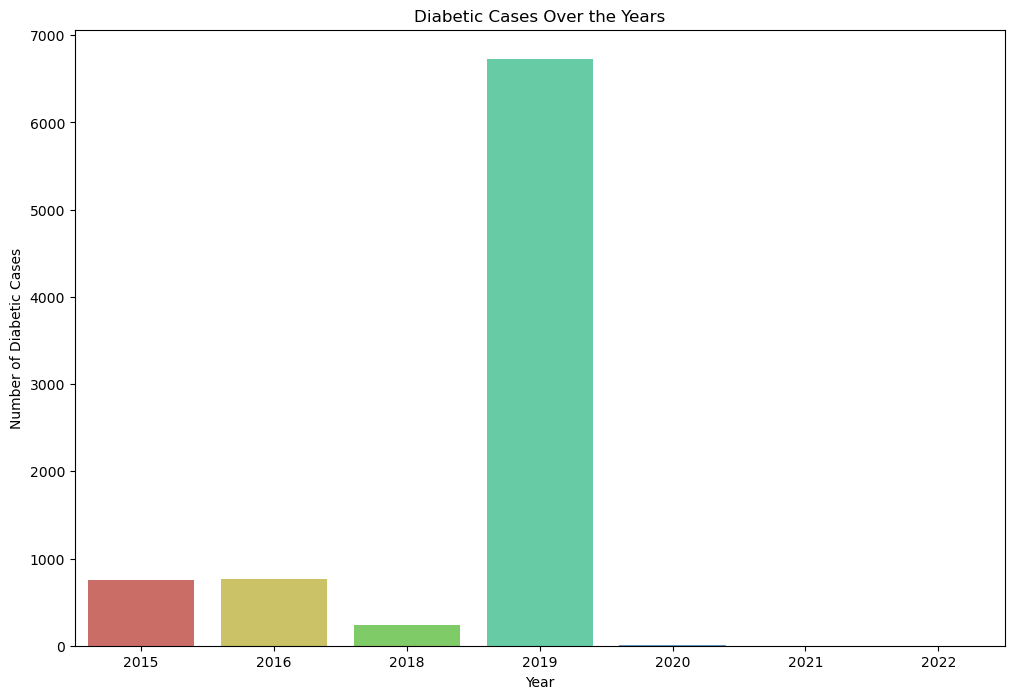

In [39]:
plt.figure(figsize=(12, 8))
sns.barplot(x=diabetes_year_counts.index, y=diabetes_year_counts.values, palette="hls")
plt.title("Diabetic Cases Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Diabetic Cases")
plt.show()

### Key insights
- The plot shows how the prevalence of diabetes has changed over the years worldwide.
- The diabetic patients in year 2015 and 2016 are relatively same in number with 759 and 765 cases.
- In year 2018 their is a sharp decline in diabetic patient.
- In year 2019, their is significant spike in the prevalence of diabetes acses as compared to the previous years.
- The prevelance of diabetes appers to drop dramatically, almost to negligible numbers in year 2020-2022.This sparse data suggest that their might be gaps in data collection maybe due to COVID-19 pandemic.

In [40]:
trends=pst_cases.groupby('year')[['blood_glucose_level','age','hbA1c_level']].mean()
trends

,blood_glucose_level,age,hbA1c_level
year,,,
2015,192.870883,82.790514,6.987615
2016,193.950327,80.708497,6.963529
2018,187.283951,82.230453,7.003292
2019,194.466181,81.979188,6.923146
2020,246.666667,85.666667,7.133333
2021,200.000000,88.000000,6.500000
2022,210.000000,82.500000,7.350000


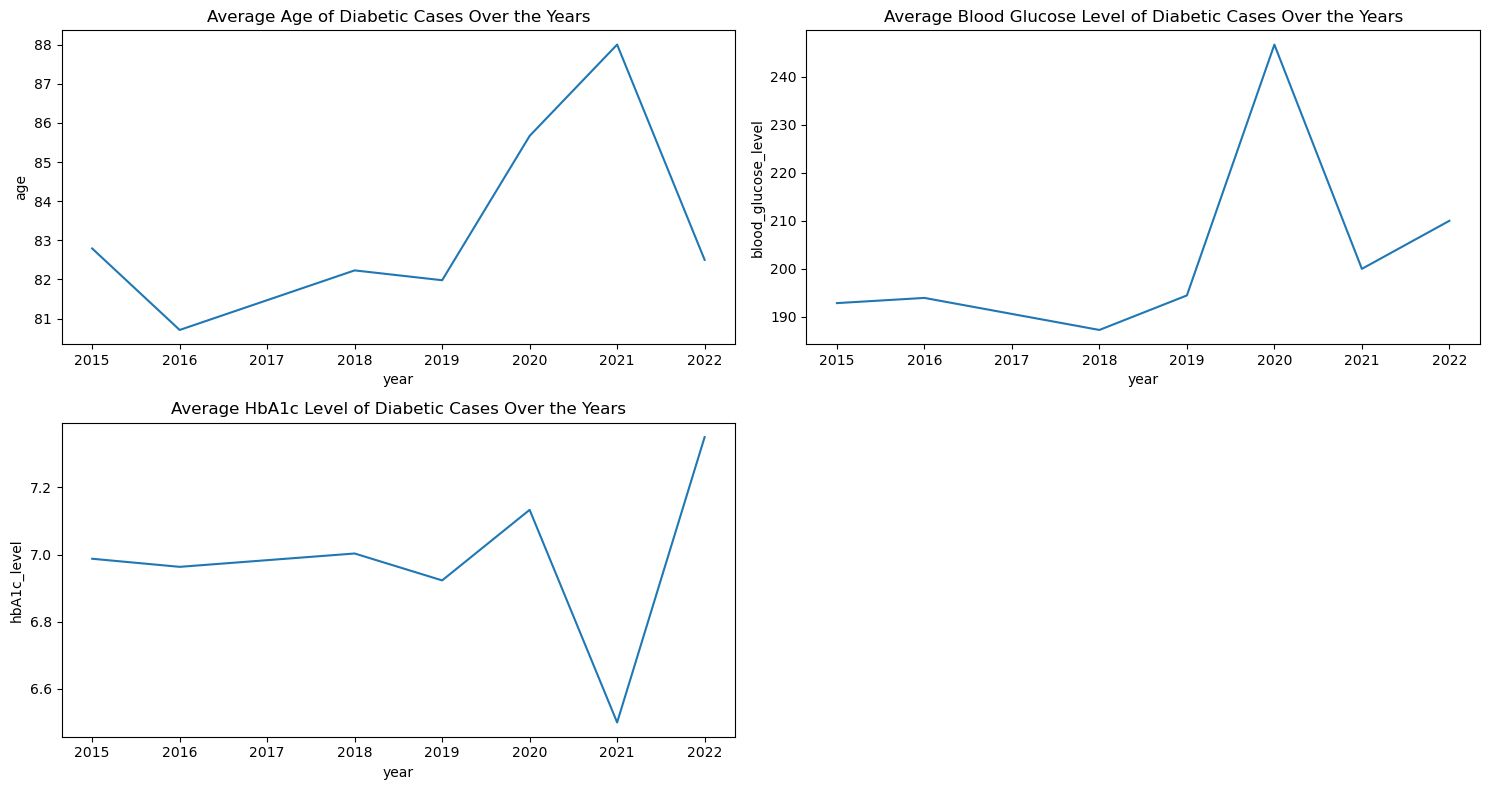

In [41]:
plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
sns.lineplot(data=trends, x=trends.index, y='age')
plt.title("Average Age of Diabetic Cases Over the Years")

plt.subplot(2, 2, 2)
sns.lineplot(data=trends, x=trends.index, y='blood_glucose_level')
plt.title("Average Blood Glucose Level of Diabetic Cases Over the Years")

plt.subplot(2, 2, 3)
sns.lineplot(data=trends, x=trends.index, y='hbA1c_level')
plt.title("Average HbA1c Level of Diabetic Cases Over the Years")

plt.tight_layout()
plt.show()

## **Average Age of Diabetic Cases**
**Trend:** The average age of diabetic cases shows some fluctuations over the years. The average age started around 83 years in 2015, dropped to about 81 years in 2016, then gradually increased, peaking around 88 years in 2020, before dropping again.

## **Average Blood Glucose Level of Diabetic Cases**
**Trend:** The average blood glucose level of diabetic cases shows a noticeable spike.From 2015 to 2018, the average blood glucose level remained relatively stable around 190-200 mg/dL. However, there was a sharp increase in 2019, peaking at around 240 mg/dL, followed by a decrease in 2020 and 2021, then a slight increase again in 2022.

## **Average HbA1c Level of Diabetic Cases**
**Trend:** The average HbA1c level also shows fluctuations over the years.The average HbA1c level was relatively stable from 2015 to 2017 around 7.0%. It then showed some variations, with a peak in 2020 and a dip in 2021, followed by another peak in 2022.